#### Carregando a base de dados

In [1]:
import pickle

with open(r'../_Material/Bases de dados/Bases pre-processadas/Base_census.pkl', mode = 'rb') as arquivo:
    p_treinamento, c_treinamento, p_teste, c_teste = pickle.load( arquivo )

In [2]:
p_treinamento.shape, c_treinamento.shape

((27676, 108), (27676,))

In [3]:
p_teste.shape, c_teste.shape

((4885, 108), (4885,))

#### Aplicação do aprendizado

In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier( n_neighbors = 12, metric='minkowski', p = 2 )

knn.fit( p_treinamento, c_treinamento )

KNeighborsClassifier(n_neighbors=12)

In [45]:
previsoes = knn.predict( p_teste )

In [46]:
from sklearn.metrics import accuracy_score

print(f'Precisão do modelo: {accuracy_score(c_teste, previsoes)*100:.2f}%')

Precisão do modelo: 83.11%


#### Visualizando resultados do modelo

In [47]:
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import classification_report
from matplotlib.pyplot import xlabel, ylabel

#### Explicação do resultado

Nesta matriz, os valores são provenientes do cruzamento entre as previsões e os valores reais do conjunto de dados. Sendo assim, pode-se chegar à seguinte conclusão:


**Para a classe "<=50K", 3.444 previsões estão corretas e 249 estão incorretas.**

<br>

**Para a classe ">50K", 616 previsões estão corretas e 576 estão incorretas.**

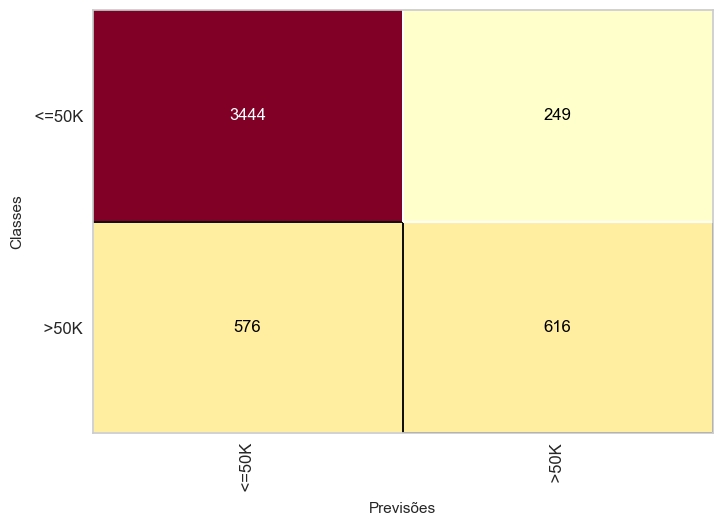

In [48]:
cm = ConfusionMatrix( knn )
cm.fit( p_treinamento, c_treinamento )
cm.score( p_teste, c_teste )

xlabel('Previsões');
ylabel('Classes');

#### Gerando relatório de classificação

In [49]:
print(classification_report( c_teste, previsoes ))

              precision    recall  f1-score   support

       <=50K       0.86      0.93      0.89      3693
        >50K       0.71      0.52      0.60      1192

    accuracy                           0.83      4885
   macro avg       0.78      0.72      0.75      4885
weighted avg       0.82      0.83      0.82      4885

